<a href="https://colab.research.google.com/github/bukhtiarhaider/CE888/blob/main/DS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv')
df.head() # Just taking a quick look at the data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


In [22]:
#Checking data types
#All of them look like Float 64 Values
#None of them are Null - Will confirm in the next step
#25 features
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

In [21]:
df_nan_count = df.isna().sum().sum()
print("NaN count in dataframe: ", df_nan_count)
# No Null Values

NaN count in dataframe:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

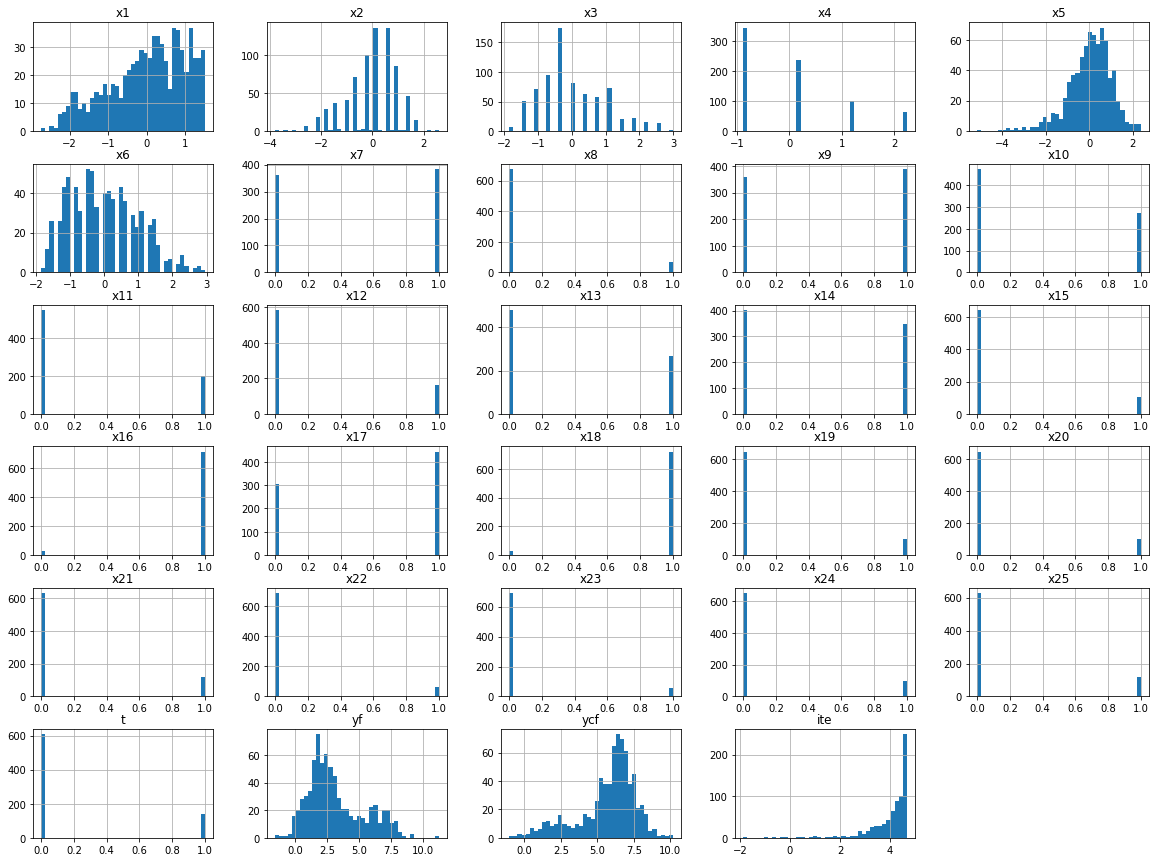

In [38]:
_ = df.hist(bins=40, figsize=(20,15))
plt.savefig('hist.png')
files.download("hist.png") 

In [6]:
#Quite a lot of columns look categorical, checking unique value counts to clarify
for i in range (25):
  col_name = 'x' + str(i+1)
  print(df[col_name].nunique())
#x7 - x25 inclusive are categorical plus maybe x4

214
46
14
4
87
30
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

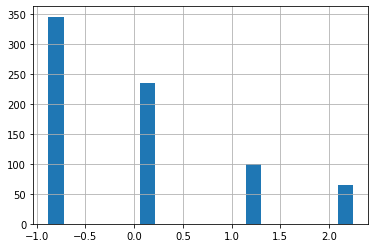

In [50]:
#Plotting x4 to check spread - Possibly a categorical value that needs to be appropriately encoded
_ = df['x4'].hist(bins=20)
plt.savefig('x4_hist.png')
files.download("x4_hist.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

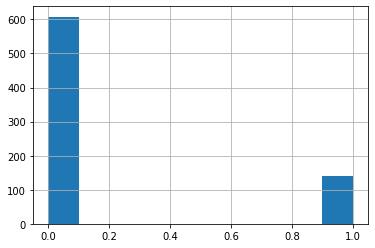

In [41]:
#Check imbalance between treatment and control groups
df['t'].hist(bins=10)
plt.savefig('unbalance.png')
files.download("unbalance.png")

In [8]:
#quite a lot of imbalance with the control group dominating the dataset
#calculate imbalance
counts = df['t'].value_counts()
(np.min(counts)/(counts[0]+counts[1])) * 100
#18.61 percent of data is from the treatment group

18.60776439089692

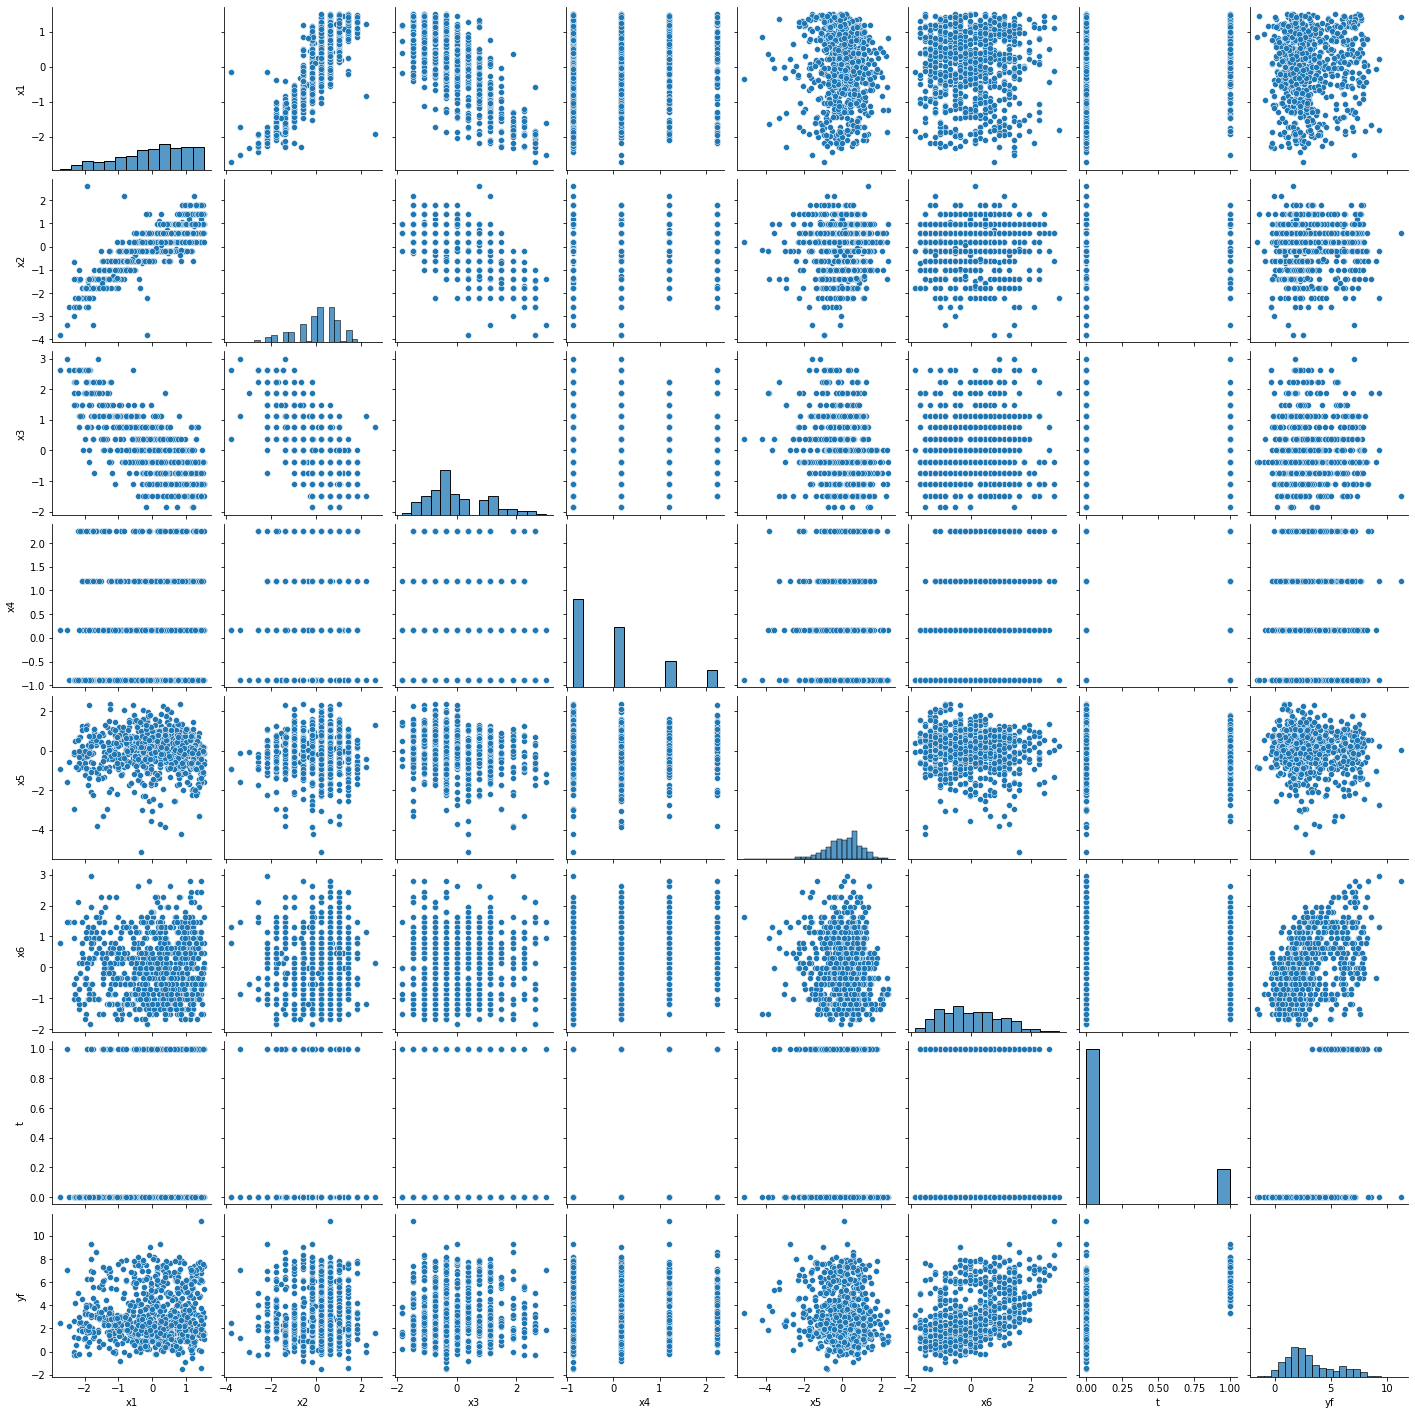

In [9]:
#plotting continuos features with t and yf to check for correlations
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 't', 'yf']
sns.pairplot(df[features])

In [16]:
# Correlations
correlations = df.corr()
# let's see how much each attribute correlates with the outcome 'yf'
correlations['yf'].sort_values(ascending=False)

yf     1.000000
t      0.718338
x6     0.497450
x9     0.220441
x15    0.203346
x17    0.152500
x25    0.122729
x4     0.115248
x18    0.060197
x21    0.057721
x2     0.054696
x12    0.054037
x1     0.053298
x8     0.027918
x13    0.019946
x3    -0.000115
x19   -0.008509
x20   -0.013108
x7    -0.047416
x14   -0.072003
x11   -0.072240
x5    -0.091339
x16   -0.093185
x23   -0.104460
x22   -0.108501
x24   -0.113997
x10   -0.163734
ycf   -0.429339
ite   -0.508433
Name: yf, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

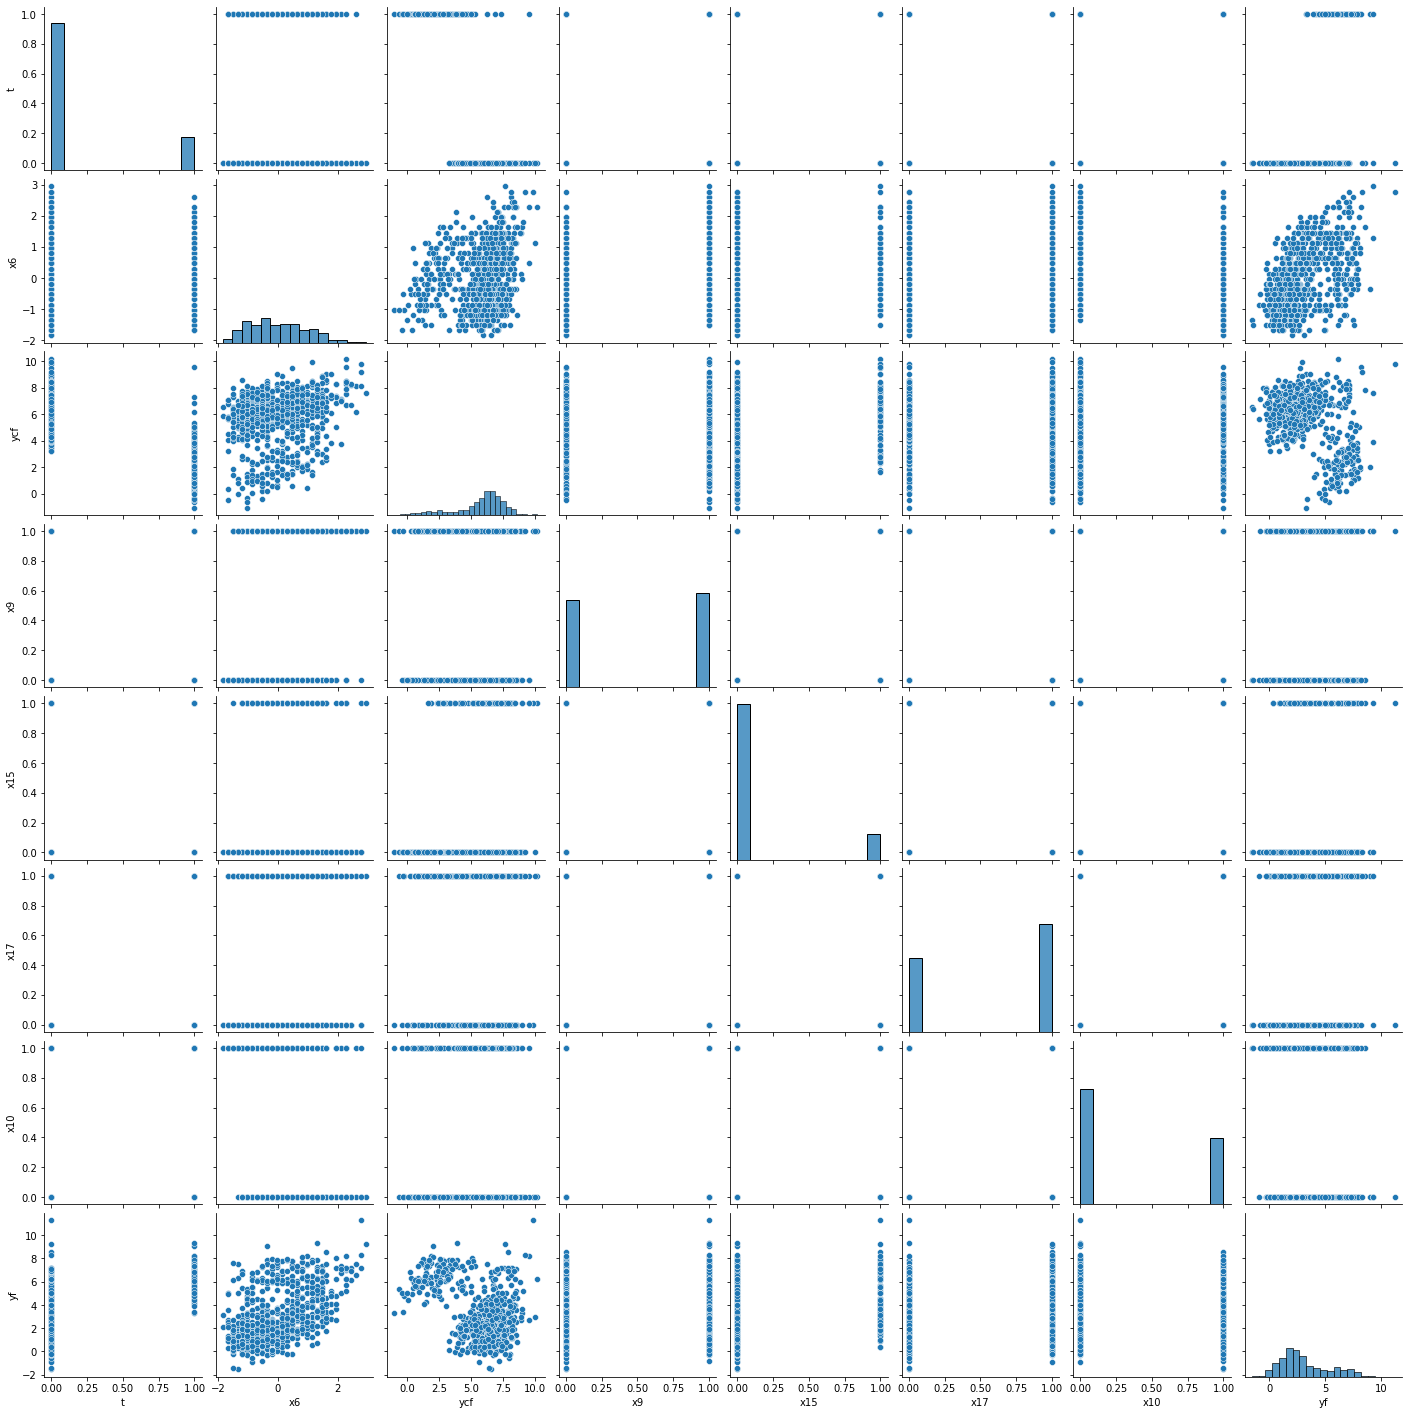

In [42]:
#pair plotting high correlation features to check for trends
features = ['t', 'x6', 'ycf', 'x9', 'x15', 'x17', 'x10', 'yf']
sns.pairplot(df[features])
plt.savefig('correlation.png')
files.download("correlation.png")

In [43]:
# Load the data (JOBS)
df2 = pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.csv')
df2.head() # Just taking a quick look at the data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0


In [45]:
#Checking data types
#All of them look like Float 64 Values
#None of them are Null - Will confirm in the next step
#17 features
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3212 non-null   float64
 1   x2      3212 non-null   float64
 2   x3      3212 non-null   float64
 3   x4      3212 non-null   float64
 4   x5      3212 non-null   float64
 5   x6      3212 non-null   float64
 6   x7      3212 non-null   float64
 7   x8      3212 non-null   float64
 8   x9      3212 non-null   float64
 9   x10     3212 non-null   float64
 10  x11     3212 non-null   float64
 11  x12     3212 non-null   float64
 12  x13     3212 non-null   float64
 13  x14     3212 non-null   float64
 14  x15     3212 non-null   float64
 15  x16     3212 non-null   float64
 16  x17     3212 non-null   float64
 17  t       3212 non-null   float64
 18  y       3212 non-null   float64
 19  e       3212 non-null   float64
dtypes: float64(20)
memory usage: 502.0 KB
None


In [46]:
df2_nan_count = df2.isna().sum().sum()
print("NaN count in dataframe: ", df2_nan_count)
# No Null Values

NaN count in dataframe:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

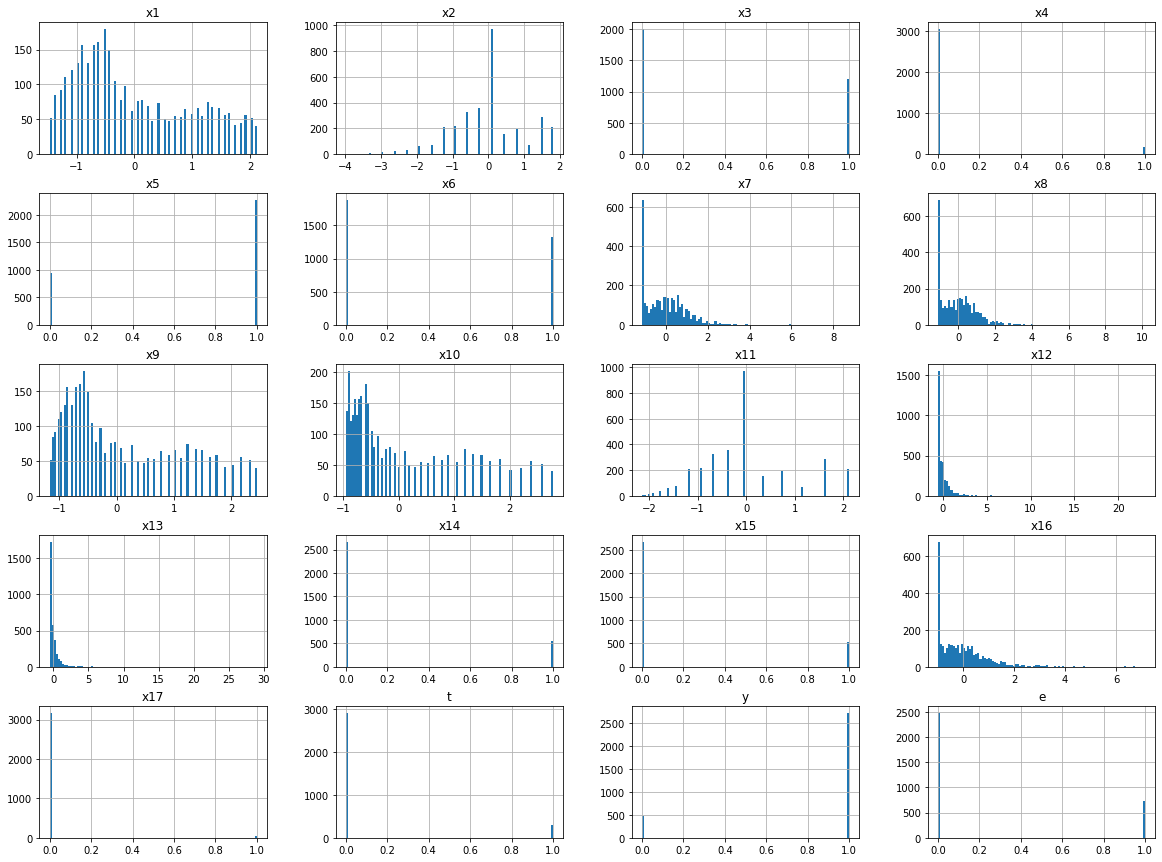

In [53]:
_ = df2.hist(bins=100, figsize=(20,15))
plt.savefig('hist2.png')
files.download("hist2.png") 

In [49]:
#Quite a lot of columns look categorical, checking unique value counts to clarify
for i in range (17):
  col_name = 'x' + str(i+1)
  print(df2[col_name].nunique())
#x3, x4, x5, x6, x14, x15, and x17 are categorical

39
17
2
2
2
2
799
843
39
39
17
799
843
2
2
1373
2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

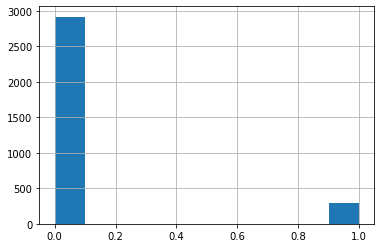

In [54]:
#Check imbalance between treatment and control groups
df2['t'].hist(bins=10)
plt.savefig('unbalance2.png')
files.download("unbalance2.png")

In [55]:
#quite a lot of imbalance with the control group dominating the dataset
#calculate imbalance
counts = df2['t'].value_counts()
(np.min(counts)/(counts[0]+counts[1])) * 100
#9.24 percent of data is from the treatment group

9.246575342465754

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

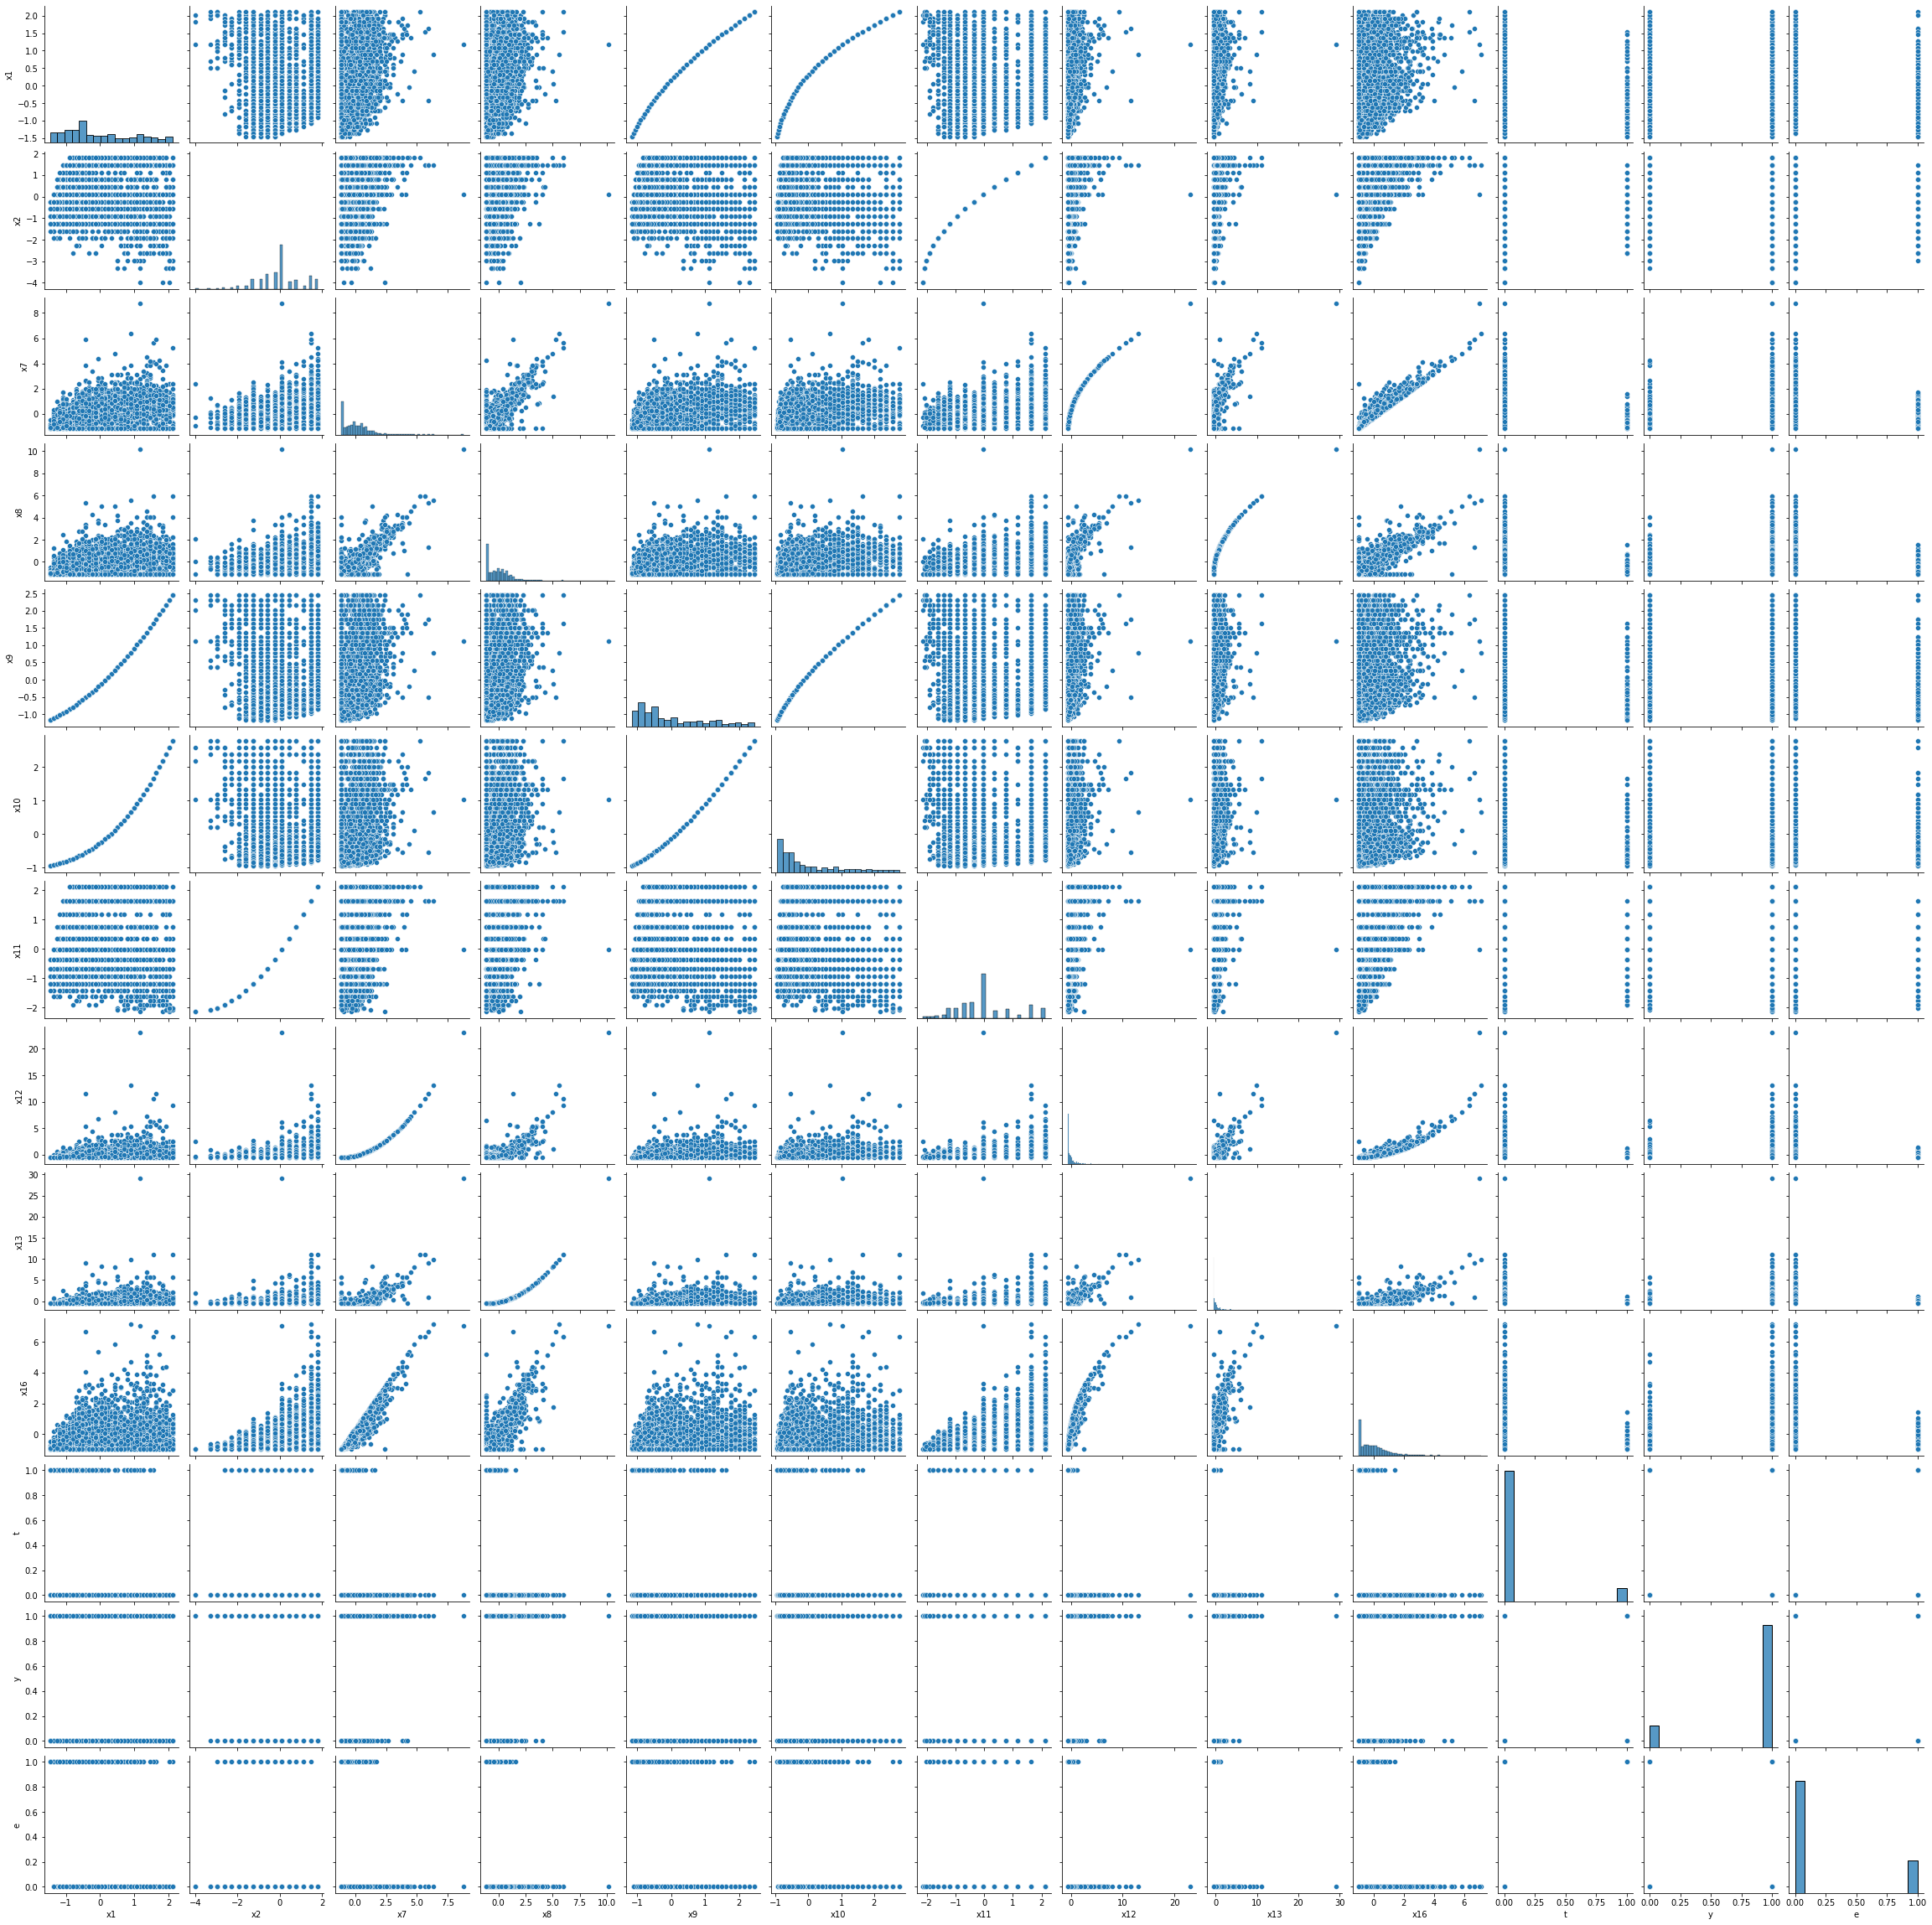

In [58]:
#plotting continuos features with t and yf to check for correlations
features = ['x1', 'x2', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x16', 't', 'y', 'e']
sns.pairplot(df2[features])
plt.savefig('pairplot.png')
files.download("pairplot.png")

In [62]:
# Correlations
correlations = df2.corr()
# let's see how much each attribute correlates with the outcome 'yf'
correlations['y'].sort_values(ascending=False)

y      1.000000
x8     0.325691
x7     0.300295
x16    0.262530
x13    0.165043
x12    0.157230
x5     0.132752
x11    0.110381
x2     0.107226
x4     0.018436
x1    -0.044480
x9    -0.054407
x17   -0.056662
x10   -0.062256
t     -0.067504
x3    -0.111014
x6    -0.130128
e     -0.183054
x14   -0.399577
x15   -0.423171
Name: y, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

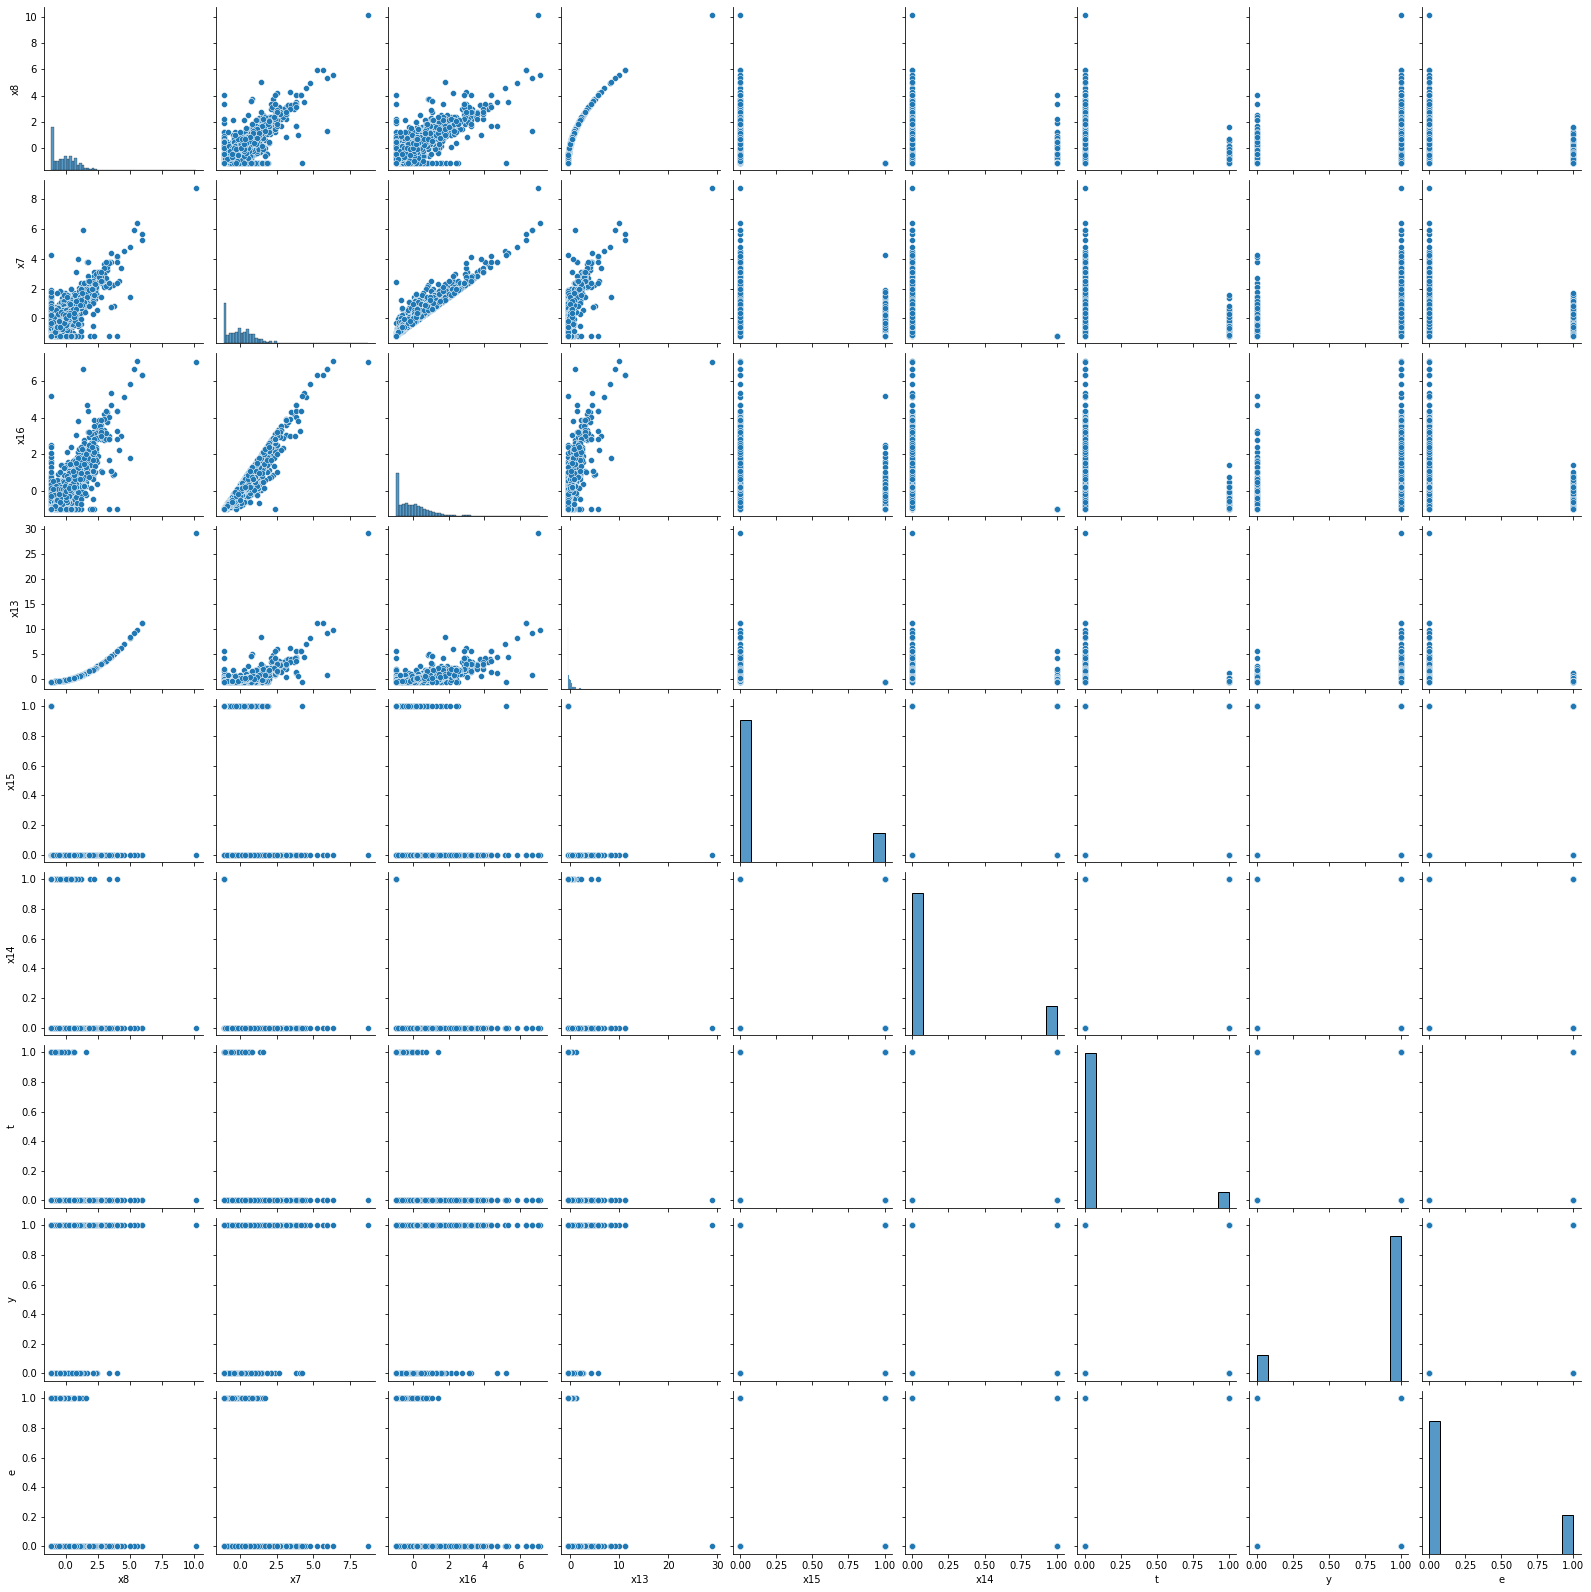

In [63]:
#plotting continuos features with t, y, and e to check for correlations
features = ['x8', 'x7', 'x16', 'x13', 'x15', 'x14', 't', 'y', 'e']
sns.pairplot(df2[features])
plt.savefig('correlations2.png')
files.download("correlations2.png")